In [1]:
import pandas as pd
import matplotlib.pyplot as plt
base_mpl_style_url = "https://raw.githubusercontent.com/KonScanner/mpl-style/main/styles/base.mplstyle"
plt.style.use(base_mpl_style_url)
import time
plt.style.use('dark_background')

In [2]:
import requests 
r = requests.get("https://api.llama.fi/protocol/sushiswap").json()
r2 = requests.get("https://api.llama.fi/charts/Polygon").json()

In [3]:
sushi_tvl = pd.DataFrame(r["chainTvls"]["Polygon"]["tvl"])
sushi_tvl["date"] = pd.to_datetime(sushi_tvl["date"],unit="s")
sushi_tvl["Sushi_TVL"] = sushi_tvl["totalLiquidityUSD"].round(0).astype(int)
polygon_tvl = pd.DataFrame(r2)
polygon_tvl["date"] = pd.to_datetime(polygon_tvl["date"],unit="s")
polygon_tvl["Polygon_TVL"] = polygon_tvl["totalLiquidityUSD"].round(0).astype(int)
del polygon_tvl["totalLiquidityUSD"], sushi_tvl["totalLiquidityUSD"]

<AxesSubplot:xlabel='date'>

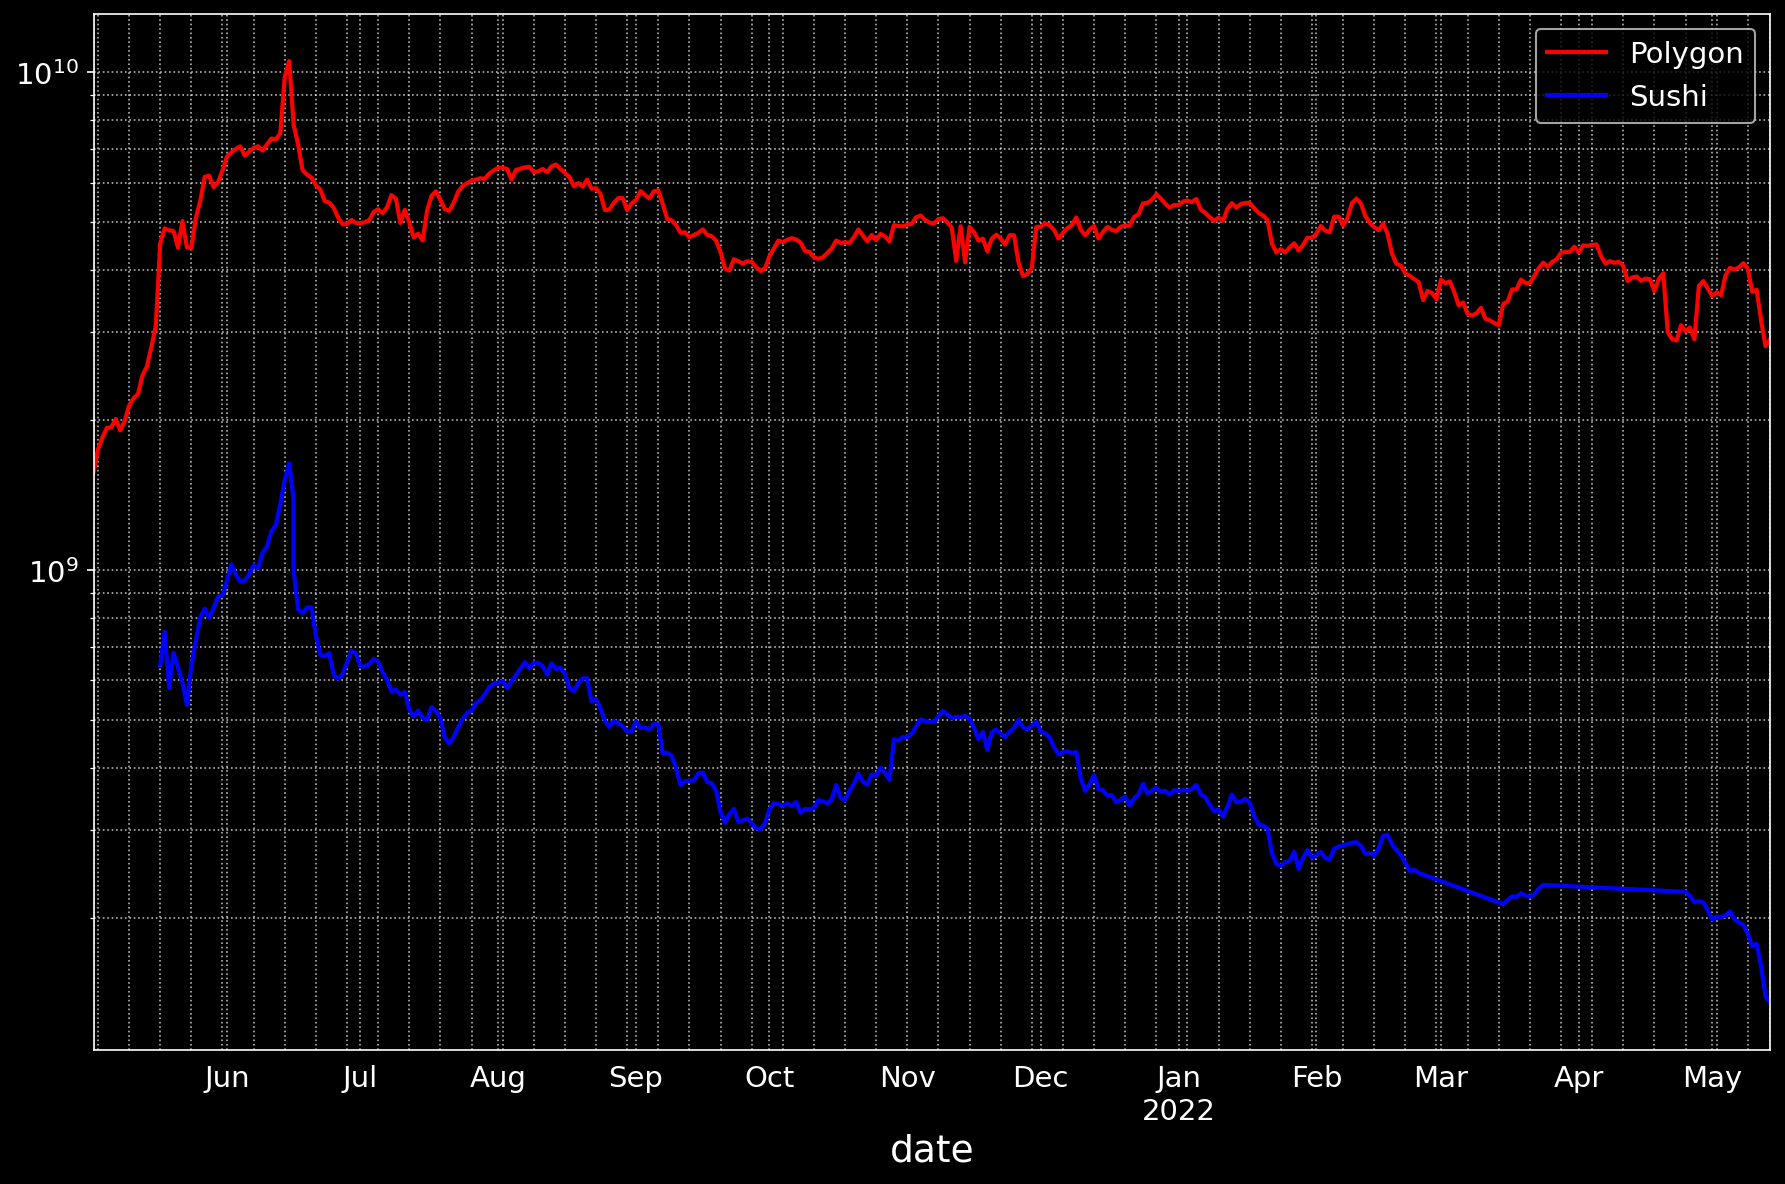

In [5]:
fig,ax=plt.subplots(figsize=(12,8))
polygon_tvl[polygon_tvl["date"] > "2021-05-01"].sort_values("date").drop_duplicates("date").plot(x="date",y="Polygon_TVL",color="red",linewidth=2,label="Polygon",ax=ax,logy=True)
sushi_tvl[sushi_tvl["date"] > "2021-05-01"].sort_values("date").drop_duplicates("date").plot(x="date",y="Sushi_TVL",color="blue",linewidth=2,label="Sushi",ax=ax,logy=True)

In [6]:
import plotly.express as px

In [11]:
sushi_tvl["from"] = "sushi"
polygon_tvl["from"] = "polygon"

data = pd.concat([sushi_tvl.rename({"Sushi_TVL":"TVL","date":"Date"},axis=1),polygon_tvl.rename({"Polygon_TVL":"TVL","date":"Date"},axis=1)])

In [19]:
fig = px.line(data[data.Date > '2021-05-15'], x="Date", y="TVL", color='from', log_y=True)
fig.show()